<a href="https://colab.research.google.com/github/anw1702/Titanic2024/blob/main/TheTitanicProject_Anwesha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#The Titanic Project

Copy and paste/type thesse codes in your Google Colab. Give your inputs in the specific checkpoints

Use this to remove the unnecessary warnings.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

import the necessary libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import gdown

mount google drive in the colab environment. Make sure the account should have the csv file in it. You can locate it in:
drive->MyDrive->locate your file->right click->copy path

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


paste your file path within the ( ) (Use the quotation marks!)

In [ ]:
data= pd.read_csv("/content/drive/MyDrive/FED_Cohort_Projects_ML-main/train (1).csv")

displays the first few rows of the dataset

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
#CHECKPOINT 1 -- Write the code to display the "last" few rows of the dataset
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


we remove unneccessary features

In [ ]:
feature = ["Name","Ticket","Cabin"]
data.drop(feature, axis = 1, inplace= True)

Here we will be vizualizing the data

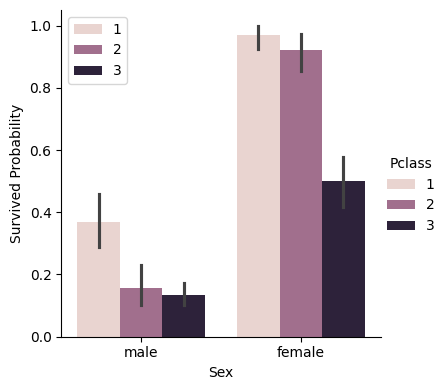

In [ ]:
x = sns.catplot(x="Sex", y="Survived", data=data, kind="bar", height=4, hue="Pclass")
x.set_ylabels("Survived Probability")
plt.legend()
plt.show()

We plot the density distribution

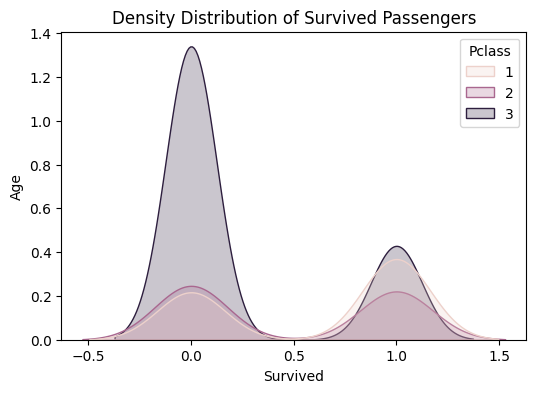

In [ ]:
plt.figure(figsize=(6, 4))
sns.kdeplot(data=data, x='Survived', fill=True, hue = "Pclass")
plt.title('Density Distribution of Survived Passengers')
plt.xlabel('Survived')
plt.ylabel('Age')
plt.show()

We plot a stacked bar chart for Died and Survived.

<Axes: xlabel='Embarked'>

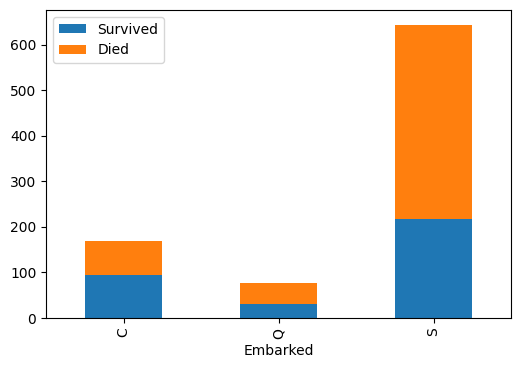

In [ ]:
data["Died"]=  1 - data["Survived"]
data.groupby("Embarked").agg("sum")[["Survived", "Died"]].plot(kind= "bar", figsize=(6,4), stacked = True)

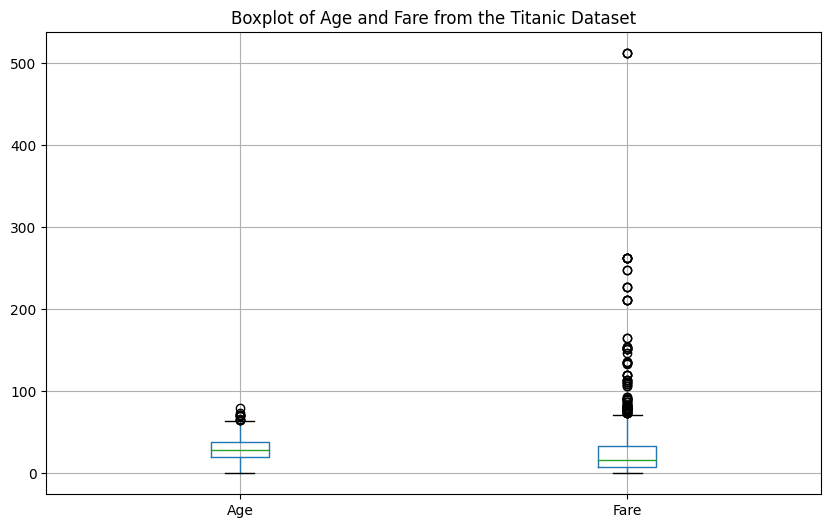

In [ ]:
#CHECKPOINT 2-- Try to draw a boxplot using any two columns. Dont use the columns which have been removed!
data_to_plot = data[['Age', 'Fare']]
data_to_plot = data_to_plot.dropna()
plt.figure(figsize=(10, 6))
data_to_plot.boxplot(column=['Age', 'Fare'])
plt.title('Boxplot of Age and Fare from the Titanic Dataset')
plt.show()

There might be NaN/null values in a dataset which can cause problems. We need to remove it.
lets use the "mean" values to replace these values.
You can also experiment by using the "Median" value to replace, by simply replacing the function

In [ ]:
mean_age= data["Age"].mean()
data["Age"]= data["Age"].fillna(mean_age)

In [ ]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       2
Died           0
dtype: int64

We see that Embarked has 2 null values, but this column has text values, so we can find Mean/median.
We simply drop these values

In [ ]:
data.dropna(subset=["Embarked"], inplace=True)

In [ ]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
Died           0
dtype: int64

For our Machine Learning Algorithm to work, we need all the value to be numerical. So do we have any textual data?

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 889 entries, 0 to 890
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  889 non-null    int64  
 1   Survived     889 non-null    int64  
 2   Pclass       889 non-null    int64  
 3   Sex          889 non-null    object 
 4   Age          889 non-null    float64
 5   SibSp        889 non-null    int64  
 6   Parch        889 non-null    int64  
 7   Fare         889 non-null    float64
 8   Embarked     889 non-null    object 
 9   Died         889 non-null    int64  
dtypes: float64(2), int64(6), object(2)
memory usage: 76.4+ KB


Well, "Sex" and "Embarked" are non-integer/non-float...so we need to convert it!
We will do Label encoding to these columns which will encode the text values in numerical form.
For Example, Sex "Male" gets encoded as "1"

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data["Sex"] = le.fit_transform(data["Sex"])
data["Embarked"] = le.fit_transform(data["Embarked"])

In [ ]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Died
0,1,0,3,1,22.0,1,0,7.2500,2,1
1,2,1,1,0,38.0,1,0,71.2833,0,0
2,3,1,3,0,26.0,0,0,7.9250,2,0
3,4,1,1,0,35.0,1,0,53.1000,2,0
4,5,0,3,1,35.0,0,0,8.0500,2,1


All data are now numerical. But wait! The Age and Fare are not lying in the same range as of other columns.
This causes large deviations in values, causing smaller values getting neglected.
To address this we use Scaling. We will use Standard Scaler

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[['Age', 'Fare']] = scaler.fit_transform(data[['Age', 'Fare']])

For machine learning algorithms, we need independent and dependent features.
independent features are the parameters and dependent features are the values derived from this parameter
machine learning models will use these two to find relations and give predictions on newer set of independent features.

In [ ]:
x = data.drop(["Survived", "Died"], axis= 1) #independent features
y = data[["Survived"]] #dependent features

Now we split the data into training set and testing set.
In machine learning, the training set is used to train the model and learn patterns,
while the testing set is used to evaluate the model’s performance on unseen data123.
This split is crucial to assess how well the trained model generalizes to new data
test size is generally kept 0.2, so it divides data into 0.8 (80%) train and 0.2 (20%) test. Its generally recommended
test size should be kept small to avoid model overfitting
The random_state parameter in machine learning is used to control the randomness
for data shuffling and other random procedures. It ensures that the random processes
produce the same results each time you run your code,
which is important for reproducibility


In [ ]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest= train_test_split(x,y, test_size=.20, random_state=42)


In [ ]:
print("xtrain shape:", xtrain.shape)
print("xtest shape:", xtest.shape)
print("ytrain shape:", ytrain.shape)
print("ytest shape:", ytest.shape)

xtrain shape: (711, 8)
xtest shape: (178, 8)
ytrain shape: (711, 1)
ytest shape: (178, 1)


model import time! Lets first use the most common classification models.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
knn = KNeighborsClassifier(n_neighbors= 5) #n_neighbours = number of neighbors
svmc = SVC(C = 5) #C -> regularization parameter for better tradeoff between low training and low testing error

fit the training data in the models

In [ ]:
knn.fit(xtrain, ytrain)

KNeighborsClassifier()

In [ ]:
#CHECKPOINT 3 --- fit the training data in the SVM model
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)
svm_model = SVC(kernel='linear')

svm_model.fit(xtrain, ytrain)
ypred = svm_model.predict(xtest)


Lets make the helper function to analyse how well our model is performing on training and testing data
xtrain xtest ytest are global variables so we dont need to declare again.

In [ ]:
from sklearn.metrics import accuracy_score, r2_score
def acc(model):
    model.fit(xtrain, ytrain)
    train_predictions = model.predict(xtrain)
    test_predictions = model.predict(xtest)
    train_accuracy = accuracy_score(ytrain, train_predictions)
    test_accuracy = accuracy_score(ytest, test_predictions)
    print(f"Training Accuracy: {train_accuracy*100:.2f}%")
    print(f"Test Accuracy: {test_accuracy*100:.2f}%")

In [ ]:
#Lets now use it. You can use it for the svm to check the results as well.
acc(knn)

Training Accuracy: 86.50%
Test Accuracy: 79.21%


we observe the training accuracy is kinda good. But we need better testing accuracy since it tells how model is performing
on unseen data.
Lets call the heavyweights, ensemble algorithms!

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [ ]:
rnd= RandomForestClassifier(n_estimators= 800,ccp_alpha=.01) #n_estimators decide the number of trees
#ccp_alpha is a complexity parameter which uses Minimal Cost Complexity Pruning
#Here higher values gets pruned, controlling tree size
grb = GradientBoostingClassifier(learning_rate = 0.001, n_estimators=1000)
#learning rate basically controls how quickly or slowly model learns from trainig data

In [ ]:
rnd.fit(xtrain,ytrain)
grb.fit(xtrain,ytrain)

GradientBoostingClassifier(learning_rate=0.001, n_estimators=1000)

In [ ]:
acc(rnd)

Training Accuracy: 83.83%
Test Accuracy: 82.02%


In [ ]:
acc(grb)

Training Accuracy: 83.26%
Test Accuracy: 82.58%


Thats some great improvement! Clearly shows the power of ensemble algorithms.

In [ ]:
#CHECKPOINT 4-- Now import, initiate and fit the training data for XGBoost Model. Use the acc() helper function.

import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
xtrain,xtest,ytrain,ytest= train_test_split(x,y, test_size=.20, random_state=42)
print("xtrain shape:", xtrain.shape)
print("xtest shape:", xtest.shape)
print("ytrain shape:", ytrain.shape)
print("ytest shape:", ytest.shape)

scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)
dtrain = xgb.DMatrix(xtrain, label=ytrain)
dtest = xgb.DMatrix(xtest, label=ytest)

xgb_model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')

# Fit the model
xgb_model.fit(xtrain, ytrain)

# Predict on the test set
y_pred = xgb_model.predict(xtest)

acc(xgb_model)








xtrain shape: (711, 8)
xtest shape: (178, 8)
ytrain shape: (711, 1)
ytest shape: (178, 1)
Training Accuracy: 100.00%
Test Accuracy: 76.97%


In [ ]:
#Now we want our model to predict on real time values. Here is the function:
def predict_survival(model):
    PassengerId = int(input("Enter PassengerId: "))
    Pclass = int(input("Enter Pclass: "))
    Sex = input("Enter Sex: ")
    Age = float(input("Enter Age: "))
    SibSp = int(input("Enter SibSp: "))
    Parch = int(input("Enter Parch: "))
    Fare = float(input("Enter Fare: "))
    Embarked = input("Enter Embarked: ")
    new_data = pd.DataFrame({
        'PassengerId': [PassengerId],
        'Pclass': [Pclass],
        'Sex': [Sex],
        'Age': [Age],
        'SibSp': [SibSp],
        'Parch': [Parch],
        'Fare': [Fare],
        'Embarked': [Embarked]
    })
    prediction = model.predict(new_data)
    return "Passenger Survived" if prediction[0] == 1 else "Passesnger Did not survive"

In [ ]:
predict_survival(grb) #Try with different models.

Enter PassengerId: 1
Enter Pclass: 3
Enter Sex: 1
Enter Age: 22
Enter SibSp: 1
Enter Parch: 0
Enter Fare: 7.25
Enter Embarked: 2


'Passesnger Did not survive'

In [ ]:
predict_survival(knn)

Enter PassengerId: 1
Enter Pclass: 3
Enter Sex: 1
Enter Age: 22
Enter SibSp: 1
Enter Parch: 0
Enter Fare: 7.2500
Enter Embarked: 2


'Passesnger Did not survive'

In [ ]:
predict_survival(rnd)

Enter PassengerId: 1
Enter Pclass: 3
Enter Sex: 1
Enter Age: 22
Enter SibSp: 1
Enter Parch: 0
Enter Fare: 7.25
Enter Embarked: 2


'Passesnger Did not survive'

In [ ]:
#All set! You have successfully completed your first ever Machine learning project!!
#Optionally you can try to acquire all the testing accuracies of different models and maybe try to plot a graph of those